Step 1: Import necessary libraries


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

Step 2: Load the CIFAR-10 dataset

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shapes of the dataset
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
#Step 3: Explore the dataset

In [ ]:
# Get unique class labels and their counts in the training set
class_labels = np.unique(y_train)
class_counts = pd.Series(y_train.flatten()).value_counts()

# Print class distribution
print("Class distribution in training data:\n", class_counts)

# Map integer labels to class names (CIFAR-10 has 10 classes)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a data frame for better readability
class_df = pd.DataFrame({'Class': class_names, 'Count': class_counts.values})
print("\nClass distribution (in labels and names):\n", class_df)


Class distribution in training data:
 6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: count, dtype: int64

Class distribution (in labels and names):
         Class  Count
0    airplane   5000
1  automobile   5000
2        bird   5000
3         cat   5000
4        deer   5000
5         dog   5000
6        frog   5000
7       horse   5000
8        ship   5000
9       truck   5000


Step 4: Visualize a few samples from each class

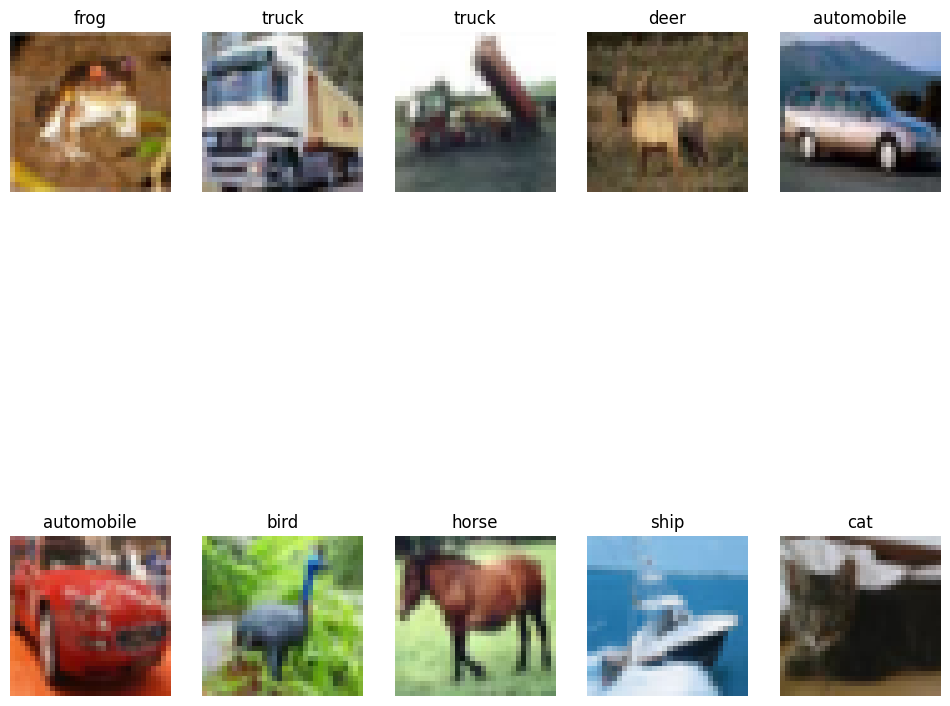

In [ ]:
# Define a function to display sample images
def plot_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# List of class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display some images
plot_images(x_train, y_train, class_names)

In [ ]:
#Step 3: Distribution of labels in CIFAF_10 TRAINING DATASET

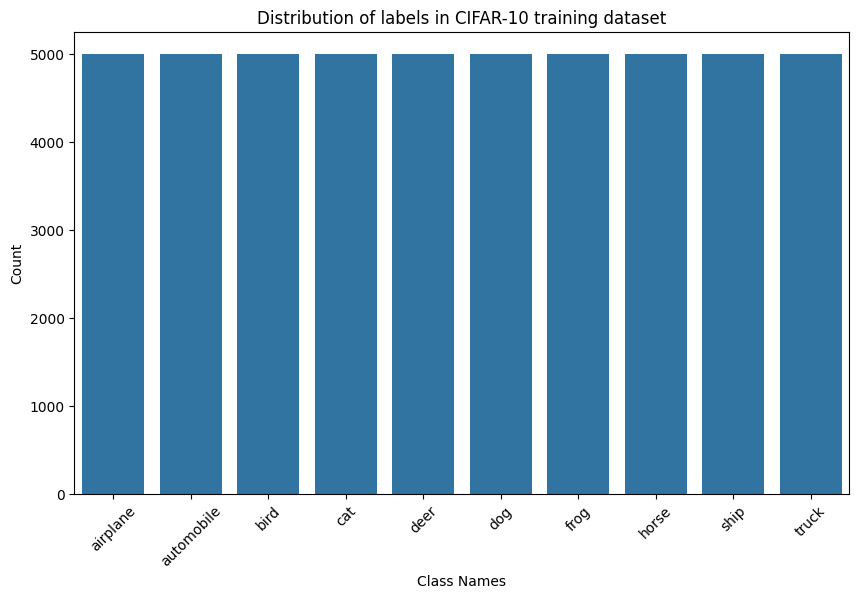

In [ ]:
# Convert the label array to a pandas series for easier plotting
label_df = pd.Series(y_train.flatten())

# Plotting the distribution of labels in the training dataset
plt.figure(figsize=(10, 6))
sns.countplot(x=label_df)
plt.title("Distribution of labels in CIFAR-10 training dataset")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.xlabel("Class Names")
plt.ylabel("Count")
plt.show()

In [ ]:
#Step 4: Image Data Preprocessing

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels (optional, but often useful/ for model training)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

#Step 5: Visualize the distribution of image pixel values

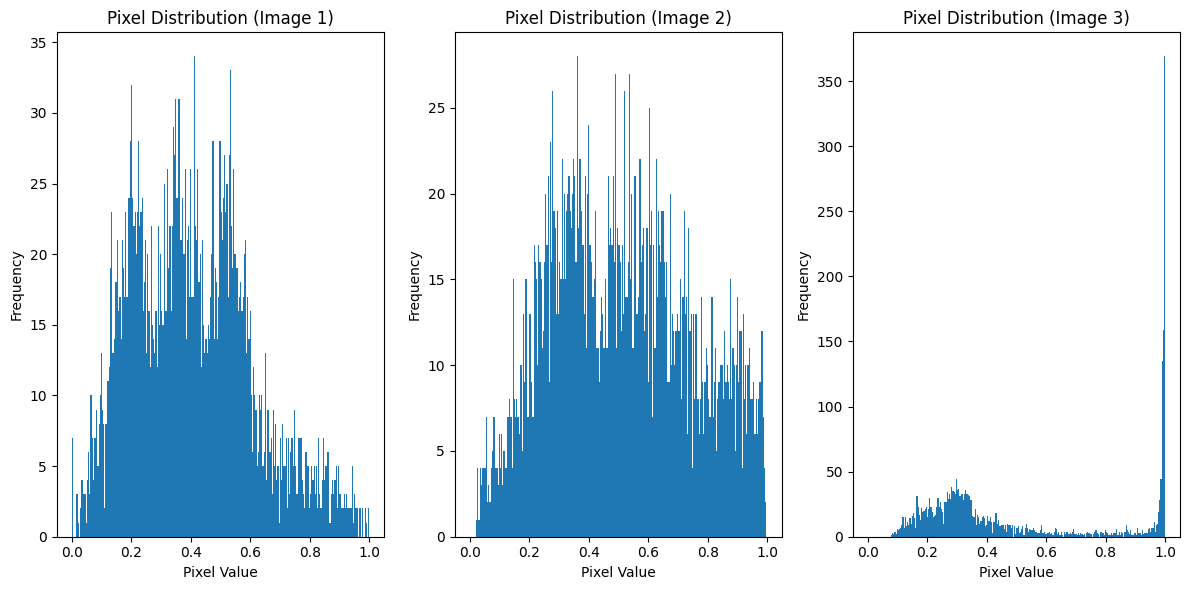

In [ ]:
# Plot histograms of pixel values for a few sample images
plt.figure(figsize=(12, 6))
for i in range(3):  # Plot for 3 sample images
    plt.subplot(1, 3, i + 1)
    plt.hist(x_train[i].flatten(), bins=256, range=(0, 1))
    plt.title(f"Pixel Distribution (Image {i + 1})")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
#Step 5: Check image statistics (mean, standard deviation)

In [ ]:
# Calculate mean and standard deviation of pixel values
train_mean = np.mean(x_train)
train_std = np.std(x_train)

print(f"Training data mean: {train_mean:.4f}")
print(f"Training data standard deviation: {train_std:.4f}")

Training data mean: 0.4734
Training data standard deviation: 0.2516


In [ ]:
#Step 6: Examine image correlation (optional)

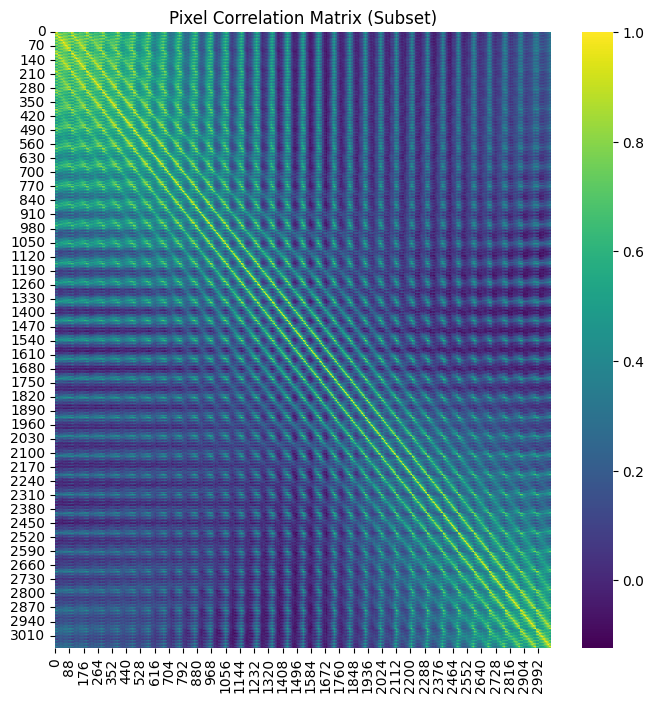

In [ ]:
# Calculate correlation matrix of pixel values (for a subset of images)
subset_size = 1000
subset_images = x_train[:subset_size].reshape(subset_size, -1)
correlation_matrix = np.corrcoef(subset_images.T)

# Visualize correlation matrix (heatmap)
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, cmap="viridis")
plt.title("Pixel Correlation Matrix (Subset)")
plt.show()

In [ ]:
# Define the CNN model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Build and display the model
cnn_model = build_cnn_model()
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define a VGG-like model
def build_vgg_model():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Build and display the VGG-like model
vgg_model = build_vgg_model()
vgg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,248,202 (12.39 MB)

 Trainable params: 3,248,202 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define a ResNet-like model
def build_resnet_model():
    base_model = keras.applications.ResNet50(weights=None, input_shape=(32, 32, 3), classes=10)
    base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return base_model

# Build and display the ResNet model
resnet_model = build_resnet_model()
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Define a MobileNet model
def build_mobilenet_model():
    base_model = keras.applications.MobileNetV2(weights=None, input_shape=(32, 32, 3), classes=10)
    base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return base_model

# Build and display the MobileNet model
mobilenet_model = build_mobilenet_model()
mobilenet_model.summary()

Model: "mobilenetv2_1.00_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 16, 16, 32)     │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 16, 16, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 16, 16, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 16, 16, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 16, 16, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 16, 16, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 16, 16, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 16, 16, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 16, 16, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 17, 17, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 8, 8, 96)       │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 2,236,682 (8.53 MB)

 Non-trainable params: 34,112 (133.25 KB)

Training CNN...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3401 - loss: 1.7992 - val_accuracy: 0.5351 - val_loss: 1.2910
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5692 - loss: 1.2122 - val_accuracy: 0.6239 - val_loss: 1.0800
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6400 - loss: 1.0328 - val_accuracy: 0.6204 - val_loss: 1.0884
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6841 - loss: 0.9062 - val_accuracy: 0.6768 - val_loss: 0.9312
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7110 - loss: 0.8204 - val_accuracy: 0.6963 - val_loss: 0.8925
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7442 - loss: 0.7391 - val_accuracy: 0.7099 - val_loss: 0.8479
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7678 - loss: 0.6645 - val_accuracy: 0.7130 - val_loss: 0.8543
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7886 - loss: 0.6121 - 

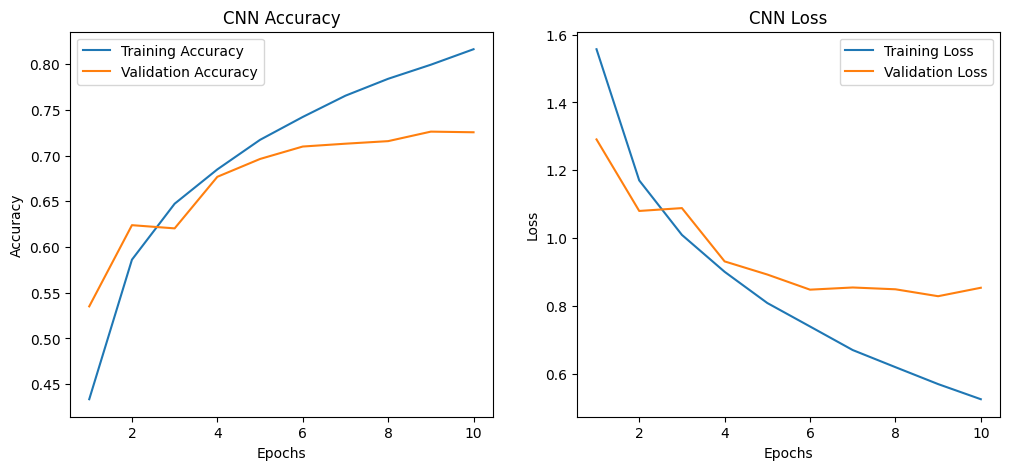

Training VGG...
Fine-tuning VGG...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.5224 - loss: 1.3481 - val_accuracy: 0.7353 - val_loss: 0.7688
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 54ms/step - accuracy: 0.7689 - loss: 0.6650 - val_accuracy: 0.7825 - val_loss: 0.6291
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8120 - loss: 0.5442 - val_accuracy: 0.7980 - val_loss: 0.5771
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8386 - loss: 0.4594 - val_accuracy: 0.8045 - val_loss: 0.5580
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.8638 - loss: 0.3927 - val_accuracy: 0.7986 - val_loss: 0.5910
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.8808 - loss: 0.3396 - val_accuracy: 0.8198 - val_loss: 0.5306
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9011 - loss: 0.2866 - val_accuracy: 0.8175 - val_loss: 0.5656
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step -

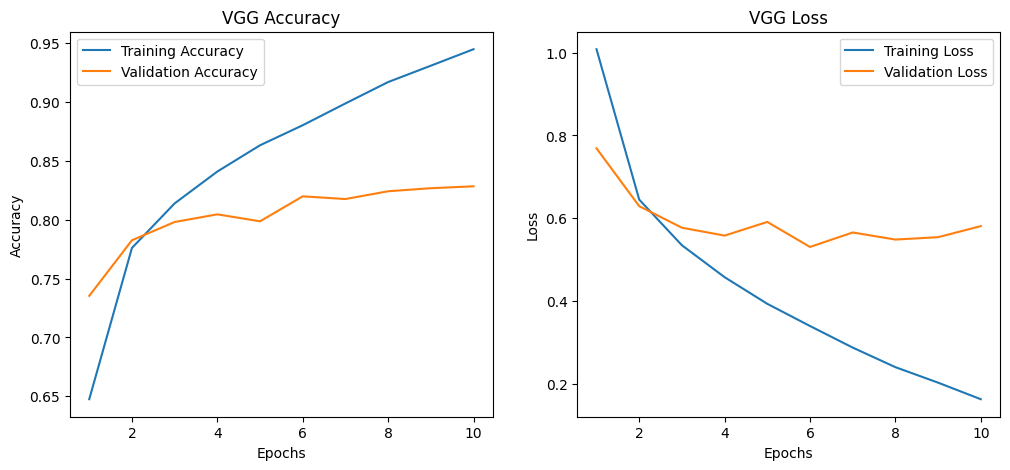

Training ResNet...
Fine-tuning ResNet...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 72ms/step - accuracy: 0.1907 - loss: 2.7148 - val_accuracy: 0.1178 - val_loss: 7.8045
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4535 - loss: 1.6098 - val_accuracy: 0.5091 - val_loss: 1.5056
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.5641 - loss: 1.2600 - val_accuracy: 0.5658 - val_loss: 1.3162
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.6335 - loss: 1.0594 - val_accuracy: 0.6032 - val_loss: 1.2027
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6826 - loss: 0.9027 - val_accuracy: 0.6296 - val_loss: 1.1340
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7292 - loss: 0.7885 - val_accuracy: 0.6540 - val_loss: 1.0740
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7602 - loss: 0.6832 - val_accuracy: 0.6646 - val_loss: 1.0478
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms

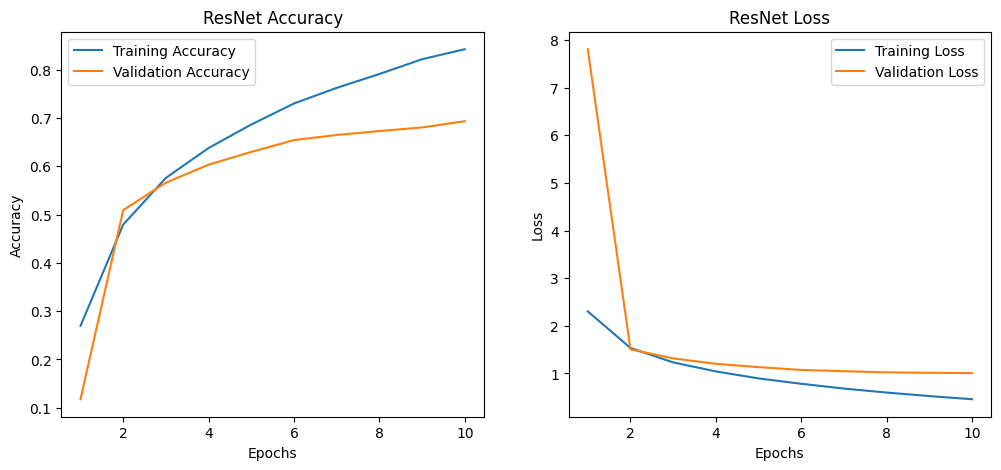

Training MobileNet...
Fine-tuning MobileNet...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 43ms/step - accuracy: 0.1365 - loss: 2.6466 - val_accuracy: 0.1195 - val_loss: 2.5803
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.2699 - loss: 2.0925 - val_accuracy: 0.1361 - val_loss: 2.3347
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.3534 - loss: 1.8521 - val_accuracy: 0.2385 - val_loss: 2.1916
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4046 - loss: 1.7043 - val_accuracy: 0.3577 - val_loss: 1.9298
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4455 - loss: 1.5870 - val_accuracy: 0.4379 - val_loss: 1.6712
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4741 - loss: 1.4958 - val_accuracy: 0.4770 - val_loss: 1.5069
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4959 - loss: 1.4358 - val_accuracy: 0.5042 - val_loss: 1.4065
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s

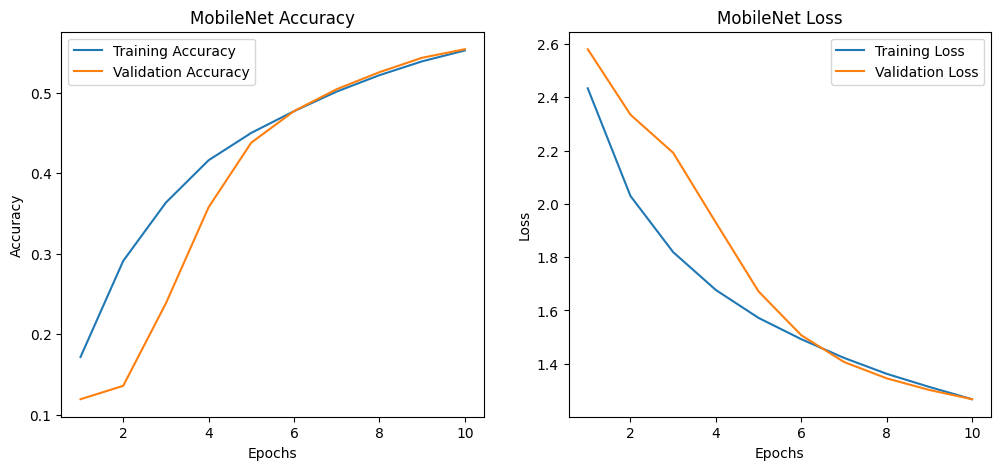

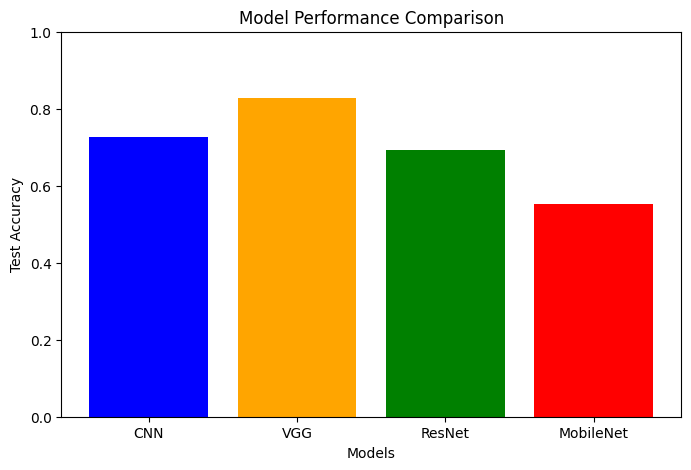

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2

# Load dataset (CIFAR-10)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Store test accuracy for bar graph
test_accuracies = {}

# Define CNN model from scratch
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define function to load pre-trained models (VGG, ResNet, MobileNet)
def build_vgg_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze base layers
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_mobilenet_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot accuracy and loss graphs
def plot_results(history, model_name):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

# Function to train and fine-tune models
def train_model(model, model_name, fine_tune=False):
    print(f"Training {model_name}...")

    if fine_tune:
        print(f"Fine-tuning {model_name}...")
        for layer in model.layers[-10:]:  # Unfreeze last 10 layers for fine-tuning
            layer.trainable = True

        # Recompile with a lower learning rate for fine-tuning
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model and store history
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"{model_name} Test Accuracy: {test_acc:.4f}")

    # Store test accuracy for bar graph
    test_accuracies[model_name] = test_acc

    # Plot training results
    plot_results(history, model_name)

# Build models
models = {
    "CNN": build_cnn_model(),
    "VGG": build_vgg_model(),
    "ResNet": build_resnet_model(),
    "MobileNet": build_mobilenet_model()
}

# Train models and visualize results
for model_name, model in models.items():
    if model_name in ["VGG", "ResNet", "MobileNet"]:  # Apply fine-tuning only to pre-trained models
        train_model(model, model_name, fine_tune=True)
    else:
        train_model(model, model_name)

# Function to plot bar graph of test accuracies
def plot_bar_graph(accuracies):
    plt.figure(figsize=(8, 5))
    plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])
    plt.xlabel("Models")
    plt.ylabel("Test Accuracy")
    plt.title("Model Performance Comparison")
    plt.ylim(0, 1)  # Accuracy range 0 to 1
    plt.show()

# Plot bar graph of model accuracies
plot_bar_graph(test_accuracies)
